<a href="https://colab.research.google.com/github/legendarychristian/SP500-LSTM-Analysis/blob/main/S%26P500_LSTM_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow keras numpy matplotlib pandas yfinance

In [ ]:
# Importing required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import matplotlib.dates as mdates

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
# Download historical data for SPY from Yahoo Finance
spy = yf.download('SPY', start='2010-01-01', end='2023-01-01')

# Split data into training (2010-2020) and validation (2020-2023) sets
training_data = spy['Adj Close']['2010-01-01':'2020-12-31']
validation_data = spy['Adj Close']['2021-01-01':'2023-01-01']

# Use 'Adj Close' prices as the stock price for training
training_set = training_data.values.reshape(-1, 1)
validation_set = validation_data.values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
training_data.head() # this is a pandas seriies

Date
2010-01-04    87.129959
2010-01-05    87.360588
2010-01-06    87.422096
2010-01-07    87.791130
2010-01-08    88.083267
Name: Adj Close, dtype: float64

In [ ]:
training_set # this is a numpy array

array([[ 87.12995911],
       [ 87.36058807],
       [ 87.42209625],
       ...,
       [355.32113647],
       [355.828125  ],
       [357.63598633]])

In [ ]:
spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,87.129959,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,87.360588,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,87.422096,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,87.791130,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,88.083267,126402800


In [ ]:
# Feature scaling using MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
validation_set_scaled = sc.transform(validation_set)

In [ ]:
print(training_set_scaled)
print(training_set_scaled.shape)

[[0.02822925]
 [0.02905777]
 [0.02927873]
 ...
 [0.99168409]
 [0.99350541]
 [1.        ]]
(2769, 1)


In [ ]:
# Creating input sequences for training
def create_sequences(data, seq_length=60):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(training_set_scaled)
X_validation, y_validation = create_sequences(validation_set_scaled)

# Reshape inputs for LSTM model
print("length of data: ", X_train.shape[0])
print("length of sequence: ", X_train.shape[1])
print("how many values each sequence corresponds to: ", 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_validation = np.reshape(X_validation, (X_validation.shape[0], X_validation.shape[1], 1))
print("so the shape of X_train is: ", X_train.shape)

length of data:  2709
length of sequence:  60
how many values each sequence corresponds to:  1
so the shape of X_train is:  (2709, 60, 1)


#Designing a stacked LSTM model with dropout regularization to prevent overfitting.

##Stacking multiple LSTM layers enables the model to learn complex relationships in the data.

In [ ]:
# Building the LSTM Model
model = keras.Sequential()
model.add(keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50, return_sequences=True))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.LSTM(units=50))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units=1))

In [ ]:
# Compiling the LSTM Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the Model and store history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_validation, y_validation))

Epoch 1/10
85/85 [==============================] - 20s 143ms/step - loss: 0.0137 - val_loss: 0.0079
Epoch 2/10
85/85 [==============================] - 10s 123ms/step - loss: 0.0027 - val_loss: 0.0107
Epoch 3/10
85/85 [==============================] - 10s 114ms/step - loss: 0.0023 - val_loss: 0.0170
Epoch 4/10
85/85 [==============================] - 11s 126ms/step - loss: 0.0025 - val_loss: 0.0188
Epoch 5/10
85/85 [==============================] - 11s 129ms/step - loss: 0.0023 - val_loss: 0.0049
Epoch 6/10
85/85 [==============================] - 11s 126ms/step - loss: 0.0022 - val_loss: 0.0116
Epoch 7/10
85/85 [==============================] - 11s 125ms/step - loss: 0.0023 - val_loss: 0.0043
Epoch 8/10
85/85 [==============================] - 11s 126ms/step - loss: 0.0020 - val_loss: 0.0137
Epoch 9/10
85/85 [==============================] - 11s 130ms/step - loss: 0.0019 - val_loss: 0.0120
Epoch 10/10
85/85 [==============================] - 10s 123ms/step - loss: 0.0019 - val_lo

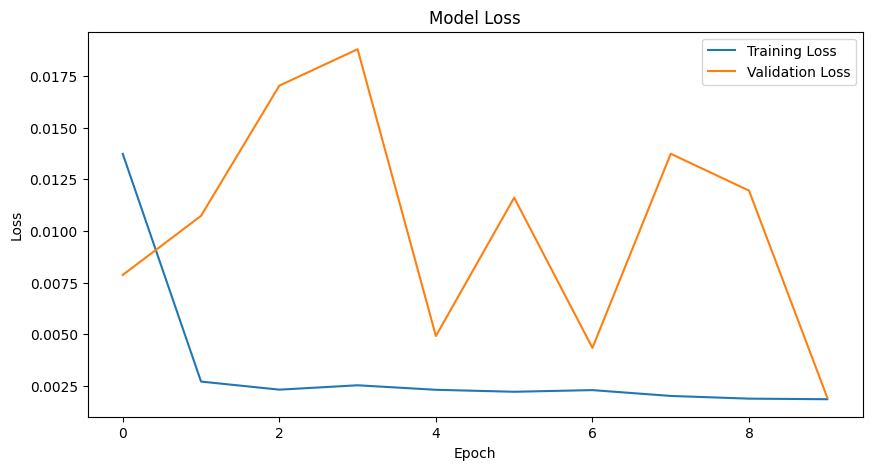

In [ ]:
# Plot loss and accuracy during training
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Testing the model

In [ ]:
# Download test data for SPY from Yahoo Finance
spy_test = yf.download('SPY', start='2023-01-01', end='2023-07-31')

# Use 'Adj Close' prices as the test data
real_stock_price = spy_test['Adj Close'].values.reshape(-1, 1)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Preparing Test Data
dataset_total = pd.concat((spy['Adj Close'], spy_test['Adj Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(spy_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Making Predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

5/5 [==============================] - 2s 30ms/step


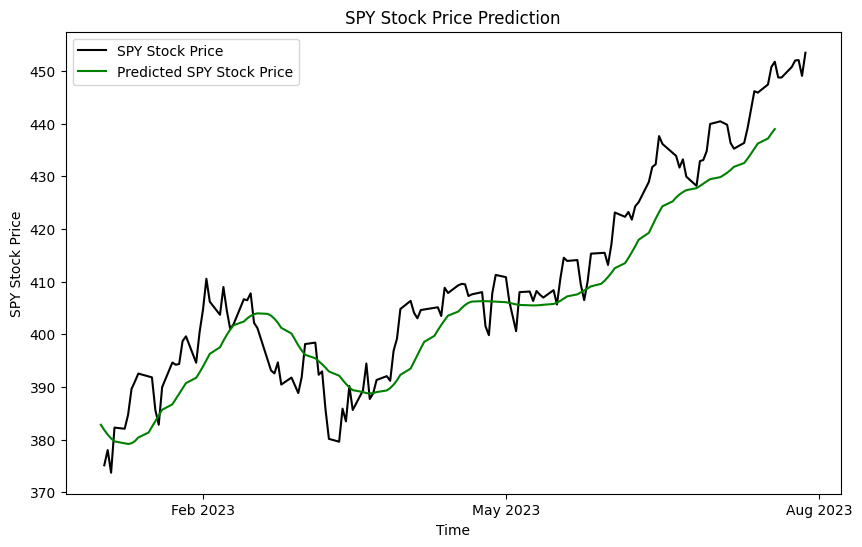

In [ ]:
# Prepare dates for the predicted stock prices
date_range = pd.date_range(start='2023-01-01', periods=len(predicted_stock_price), freq='B')  # 'B' for business day frequency

# Visualizing Results with Month and Year on X-axis
plt.figure(figsize=(10, 6))
plt.plot(spy_test.index, real_stock_price, color='black', label='SPY Stock Price')
plt.plot(date_range, predicted_stock_price, color='green', label='Predicted SPY Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show tick marks for every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format x-axis labels as 'Jan 2023', 'Feb 2023', etc.
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()